# Fig. 5 - Rate model shows SWR-like events

Rate model displays SWR-like evoked events. Stimulation is added to all three populations. Now the synaptic depression on the B $\to$ A connection is treated as a state variable of the system.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
from neurolib.models.multimodel import MultiModel
from neurolib.utils.stimulus import StepInput, ZeroInput

from hippocampus import HIPPOCAMPUS_NODE_DEFAULT_CONNECTIVITY, HippocampalCA3Node
from utils import AnchoredHScaleBar

plt.style.use("default_light")

## Helper function
- `hc_rate_with_pulse`: integrates the model for short time with a step pulse of given size and length of 10 ms.

In [2]:
PULSE_START = 100  # ms
PULSE_LEN = 10  # ms
SIM_DURATION = 300  # ms


def hc_rate_with_pulse(pulse_size, pulse_mass, backend="numba"):
    hc = HippocampalCA3Node(aswr_mass_type="variable_depression")
    for mass in hc:
        mass._noise_input = [ZeroInput()]
    hc[pulse_mass]._noise_input = [
        StepInput(
            step_size=pulse_size,
            stim_start=PULSE_START,
            stim_end=PULSE_START + PULSE_LEN,
        )
    ]
    m = MultiModel.init_node(hc)
    m.model_instance.initial_state = np.array([0.0001, 0.003, 0.012, 0.649])
    m.params["backend"] = backend
    m.params["duration"] = SIM_DURATION
    m.params["dt"] = 0.05
    m.params["sampling_dt"] = 0.1
    m.run()
    return m.xr()

## Plot

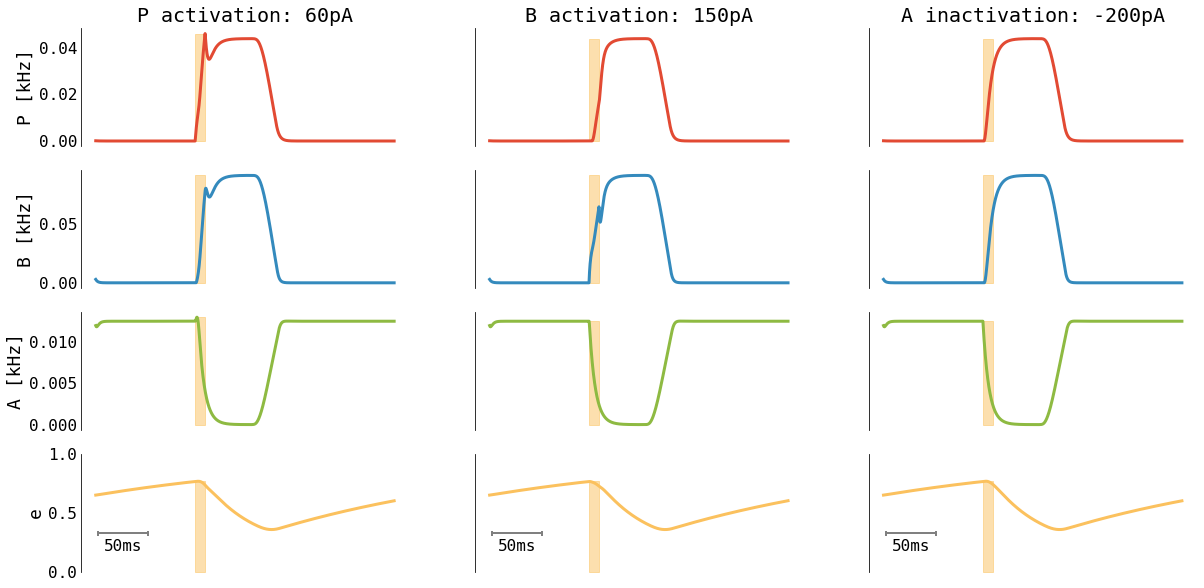

In [3]:
fig, axs = plt.subplots(nrows=4, ncols=3, sharex=True, sharey="row", figsize=(20, 10))

cols = ["C0", "C1", "C5", "C4"]
fields = ["r_mean_EXC", "r_mean_INH", "r_mean_aSWR", "e_aSWR"]
PULSE_SIZES = [60.0, 150.0, -200.0]
ylabels = ["P [kHz]", "B [kHz]", "A [kHz]", "e"]
titles = ["P activation", "B activation", "A inactivation"]

for mass in range(3):
    res = hc_rate_with_pulse(pulse_size=PULSE_SIZES[mass], pulse_mass=mass)
    for i in range(4):
        ax = axs[i, mass]
        ax.plot(
            res.time, res.sel({"output": fields[i]}).T, linewidth=3.0, color=cols[i]
        )
        ax.fill_between(
            np.arange(
                PULSE_START / 1000.0, (PULSE_START + PULSE_LEN + 0.05) / 1000.0, 0.00005
            ),
            0,
            res.sel({"output": fields[i]}).max(),
            alpha=0.5,
            color="C4",
        )
        if mass == 0:
            ax.set_ylabel(ylabels[i])
        if i == 0:
            ax.set_title(f"{titles[mass]}: {PULSE_SIZES[mass]:.0f}pA")
        if i == 3:
            ax.set_ylim([0, 1])
            bar = AnchoredHScaleBar(
                size=0.05,
                label="50ms",
                loc=3,
                linekw=dict(color="gray", linewidth=2.0),
                ax=ax,
            )
            ax.add_artist(bar)
        ax.set_xticks([])
        sns.despine(ax=ax, bottom=True)

plt.savefig("../figs/rate_current_SWR.pdf", transparent=True, bbox_inches="tight")

## Repeat for `jitcdde` backend

/Users/nikola/.virtualenvs/paper_hc/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=0.1. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
  0%|          | 0/3000 [00:00<?, ?it/s]/Users/nikola/.virtualenvs/paper_hc/lib/python3.7/site-packages/jitcdde/_jitcdde.py:791: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.
  warn("The target time is smaller t

Using default integration parameters.



/Users/nikola/.virtualenvs/paper_hc/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=0.1. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
  0%|          | 0/3000 [00:00<?, ?it/s]/Users/nikola/.virtualenvs/paper_hc/lib/python3.7/site-packages/jitcdde/_jitcdde.py:791: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.
  warn("The target time is smaller 

Using default integration parameters.



/Users/nikola/.virtualenvs/paper_hc/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=0.1. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
  0%|          | 0/3000 [00:00<?, ?it/s]/Users/nikola/.virtualenvs/paper_hc/lib/python3.7/site-packages/jitcdde/_jitcdde.py:791: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.
  warn("The target time is smaller 

Using default integration parameters.


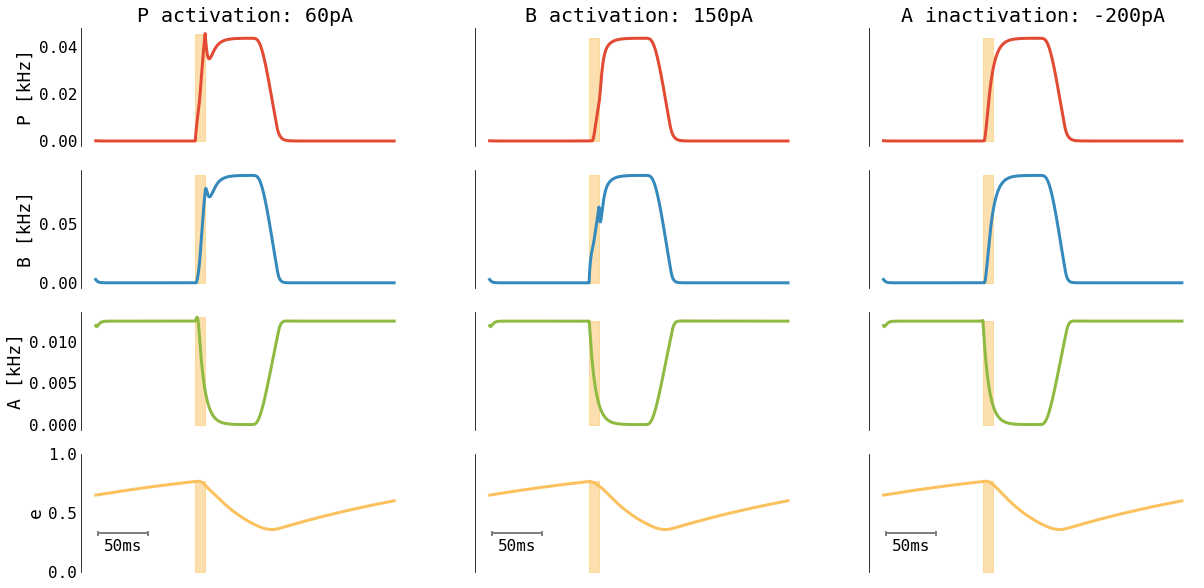

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=3, sharex=True, sharey="row", figsize=(20, 10))

cols = ["C0", "C1", "C5", "C4"]
fields = ["r_mean_EXC", "r_mean_INH", "r_mean_aSWR", "e_aSWR"]
PULSE_SIZES = [60.0, 150.0, -200.0]
ylabels = ["P [kHz]", "B [kHz]", "A [kHz]", "e"]
titles = ["P activation", "B activation", "A inactivation"]

for mass in range(3):
    res = hc_rate_with_pulse(pulse_size=PULSE_SIZES[mass], pulse_mass=mass, backend="jitcdde")
    for i in range(4):
        ax = axs[i, mass]
        ax.plot(
            res.time, res.sel({"output": fields[i]}).T, linewidth=3.0, color=cols[i]
        )
        ax.fill_between(
            np.arange(
                PULSE_START / 1000.0, (PULSE_START + PULSE_LEN + 0.05) / 1000.0, 0.00005
            ),
            0,
            res.sel({"output": fields[i]}).max(),
            alpha=0.5,
            color="C4",
        )
        if mass == 0:
            ax.set_ylabel(ylabels[i])
        if i == 0:
            ax.set_title(f"{titles[mass]}: {PULSE_SIZES[mass]:.0f}pA")
        if i == 3:
            ax.set_ylim([0, 1])
            bar = AnchoredHScaleBar(
                size=0.05,
                label="50ms",
                loc=3,
                linekw=dict(color="gray", linewidth=2.0),
                ax=ax,
            )
            ax.add_artist(bar)
        ax.set_xticks([])
        sns.despine(ax=ax, bottom=True)

## Profit

We got same figures, all good.